$%operadores de latex simplificados
\newcommand{\parder}[2]{\frac{\partial #1}{\partial #2}}            % Derivada Parcial
\newcommand{\pardder}[2]{\frac{\partial^2 #1}{\partial #2^2}}       % Derivada Parcial Segunda
\newcommand{\parddercross}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}  % Derivada Parcial Segunda cruzada
\newcommand{\pardern}[3]{\frac{\partial^{#3} #1}{\partial #2^{#3}}} % Derivada Parcial de orden #3
\newcommand{\totder}[2]{\frac{\text{d} #1}{\text{d} #2}}            % Derivada total
\newcommand{\totdder}[2]{\frac{\text{d}^2 #1}{\text{d} #2^2}}       % Derivada total Segunda
\newcommand{\totdern}[3]{\frac{\text{d}^{#3} #1}{\text{d} #2^{#3}}} % Derivada total de orden #3
\newcommand{\sustder}[2]{\frac{\text{D} #1}{\text{D} #2}}              % Derivada sustancial
\newcommand{\varg}{\phi}               % Variable genérica (escalar)
\newcommand{ \heat}{\dot{\mathcal{Q}}}
\newcommand{\half}{\frac{1}{2}}  
\newcommand{\xcoor}{x}                  % Coordenada x
\newcommand{\ycoor}{y}                  % Coordenada y
\newcommand{\varg}{\phi}               % Variable genérica (escalar)
\newcommand{\ii}{\textbf{i}}
\newcommand{\abs}[1]{\left| #1 \right|}   
$
# Ecuación de la convección - difusión-reacción

La ecuación de convección difusión reacción representa el transporte de una propiedad escalar cualquiera $\phi$ por un flujo. En su versión general para un vector velocidad cualquiera 

$$ \parder{\phi}{t}+ \nabla\cdot(\phi \vec{V})=\nabla\cdot( \Gamma \nabla\phi)+ S_\phi$$

donde $\Gamma$ es una difusividad, es decir la tasa con la que $\phi$ se propaga por difusión. Si $\phi $ fuera una temperatura, entonces $\Gamma=\frac{\kappa}{\rho c_v}$. 

Si $\phi $ fuera una componente del vector velocidad, entonces $\Gamma$ sería la viscosidad cinemática

## Ecuación de la convección - difusión-reacción 1D lineal

si la velocidad y la difusividad son constantes y tiene sólo una componente en x $a_0$ la ecuación se reduce a 

$$ \parder{\phi}{t}+ a_0 \parder{\phi}{x}=  \Gamma \pardder{\phi}{x}+ S_\phi$$
 Como es una ecuación de segundo orden, son necesarias dos condiciones de contorno para resolverla. Cuando tenemos condiciones de Dirichlet en ambos extremos
 
 $$\begin{aligned}
 \phi(x=0)&=\phi_{in}\\
 \phi(x=L)&=\phi_{out}\\
 \end{aligned}
 $$

## Ecuación de la convección-reacción 1D lineal

En el caso de que el término difusivo no esté, la ODE es de primer orden y sus propiedades cambian drásticamente.
El problema es un problema de valor inicial con una sola condición de contorno
$$ \parder{\phi}{t}+ a_0 \parder{\phi}{x}=  S_\phi$$
$$
 \phi(x=0)=\phi_{in}
 $$
 
 Si se impone además $\phi_{out}$ aparecerá una discontinuidad en la solución en $x=L$
 
 
 Esto implica físicamente que, a  medida que la difusión se aproxime a cero la solución presentará una región con gradientes abruptos cerca a $x=L$. Es un comportamiento similar al del flujo externo a alto Re, con una región de capa límite.  
 En este caso se dice que dicha ecuación es una versión **singularmente perturbada** de la convección pura, ya que al agregar el término difusivo con $\Gamma << 1$ el carácter de la ecuación y su solución se ven fuertemente afectadas.
 
 

In [1]:
"""
solución de la ec de conv difusión 1D estacionaria
"""
import sympy as sym
import numpy as np
import math as m



# parámetros del problema

x, Γ, a_0, L, φ_i, φ_o =sym.symbols('x, Gamma, a_0 , L, phi_i, phi_o') #declaro las variables simbólica
φ= sym.Function("phi") #declaro phi como función simbólica


# función que define los términos fuente
def S(x, L):
    return 0
    #return 1-(x/L)**2
# solución simbólica de la convección difusión
φ_cd=sym.dsolve(a_0 *sym.Derivative(φ(x),x)-Γ *sym.Derivative(φ(x),x,x)- S(x,L), φ(x), ics={φ(0):φ_i,φ(L):φ_o})
print('conv difusion',φ_cd.rhs)

φ_cd_lamb=sym.utilities.lambdify(( x,Γ,a_0 , L,φ_i, φ_o), φ_cd.rhs)#transformación a función no simbólica para graficar 



φ_cd


conv difusion (-phi_i + phi_o)*exp(a_0*x/Gamma)/(exp(L*a_0/Gamma) - 1) + (phi_i*exp(L*a_0/Gamma) - phi_o)/(exp(L*a_0/Gamma) - 1)


Eq(phi(x), (-phi_i + phi_o)*exp(a_0*x/Gamma)/(exp(L*a_0/Gamma) - 1) + (phi_i*exp(L*a_0/Gamma) - phi_o)/(exp(L*a_0/Gamma) - 1))

In [2]:
# solución simbólica de la convección pura
φ_c=sym.dsolve(a_0 *sym.Derivative(φ(x),x)- S(x,L), φ(x), ics={φ(0):φ_i})
#print("conv pura",φ_c.rhs)
φ_c_lamb=sym.utilities.lambdify(( x, a_0, L, φ_i), φ_c.rhs)#transformación a función no simbólica para graficar 
φ_c

Eq(phi(x), phi_i)

Vemos que en las soluciones aparece un parámetro adimensional, llamado *número de Péclet*

$$\text{Pe}=\frac{a_0\cdot L}{\Gamma}$$
éste es análogo al número de Reynolds, ya que relaciona efectos convectivos (inerciales) con difusivos (viscosos). La solución analítica queda en función de dos números de Péclet: el *Péclet basado en x*  $\text{Pe}_x=\frac{a_0 x}{\Gamma}$ y el *Péclet del dominio* $\text{Pe}=\frac{a_0 L}{\Gamma}$ 

$$-\frac{(\phi_i - \phi_o)e^{\text{Pe}_x}}{e^{\text{Pe}_L} - 1} + \frac{\phi_i e^{ \text{Pe}_L} - \phi_o}{e^{\text{Pe}_L} - 1}$$


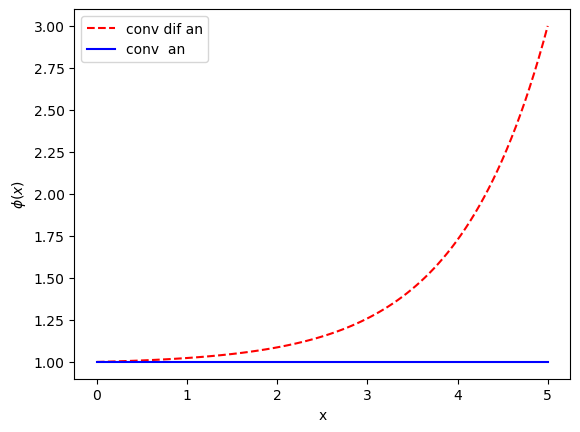

In [3]:
""" gráficos de las soluciones analíticas"""

## discretización espacial
nx=100
Ln=5
x_vec=np.linspace(0,Ln, nx);# vector de discretización espacial

#valores de los parámetros
Γn=1;
a_0n=1;
φ_in=1;
φ_on=3; 
##gráficos de las soluciones
φ_cd_vec_an=φ_cd_lamb(x_vec, Γn,a_0n,Ln, φ_in, φ_on)
φ_c_vec_an=φ_c_lamb(x_vec, a_0n, Ln, φ_in)

if np.size(φ_c_vec_an)==1:
    φ_c_vec_an=φ_c_vec_an*np.ones(np.size(x_vec))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_vec,φ_cd_vec_an, 'r--')
plt.plot(x_vec,φ_c_vec_an, 'b')

plt.xlabel('x')
plt.ylabel('$\phi(x)$')
plt.gca().legend(('conv dif an', 'conv  an'))
plt.show()

# Solucion numérica

## Esquema de diferencias centradas
Planteando un esquema de discretización con diferencias centradas  de segundo orden se obtiene

$$  a_0 \frac{\phi_{i+1}-\phi_{i-1}}{2\Delta x}=  \Gamma \frac{\phi_{i+1}-2\phi_{i}+ \phi_{i-1}}{\Delta x^2}+ S(x_i)$$

El sistema de ecuaciones puede escribirse en forma matricial como


In [4]:
i ,Delta_x= sym.symbols('i, \Delta_x')

ec_conv_dif= -a_0 /(2* Delta_x) *(φ(i+1)-φ(i-1))+ Γ/((Delta_x)**2) *(φ(i+1)-2*φ(i)+ φ(i-1))
ec_conv_dif=sym.collect(ec_conv_dif.expand(), (φ(i+1), φ(i), φ(i-1)))
ec_conv_dif*(-1)
#sym.collect(sym.expand(ec_conv_dif/(2* Γ/((Delta_x)**2))),(φ(i+1), φ(i), φ(i-1)))

2*Gamma*phi(i)/\Delta_x**2 - (Gamma/\Delta_x**2 - a_0/(2*\Delta_x))*phi(i + 1) - (Gamma/\Delta_x**2 + a_0/(2*\Delta_x))*phi(i - 1)

La solución numérica queda expresada en función del número de Péclet basado en $\Delta x$ , o también conocido como *Péclet de la malla*

{\Delta_x} 0.5
Pe_{\Delta_x} 5.0


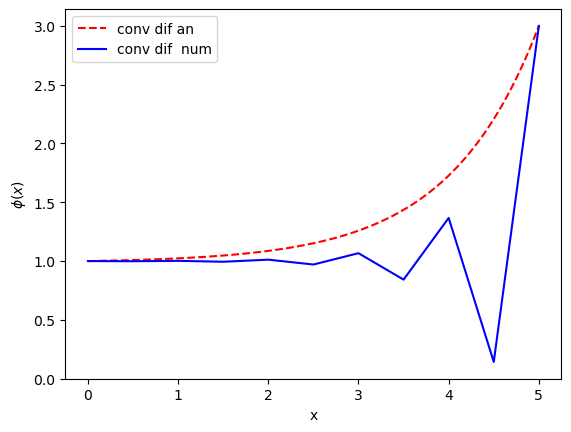

In [4]:
""" solución numérica de la ecuación de convección difusión estacionaria
con cond de contorno de dirichlet
Esquema de diferencias centradas
"""
nx=10
## discretización espacial
x_vec_num=np.linspace(0,Ln, nx+1);# vector de discretización espacial

Delta_x=x_vec_num[1]-x_vec_num[0]
print('{\Delta_x}', Delta_x)
#valores de los parámetros
Γn=0.1;
a_0n=1;
φ_in=1;
φ_on=3; 

Pe_deltax= a_0n*Delta_x/Γn
print('Pe_{\Delta_x}', Pe_deltax)

#matriz de coeficientes
M=np.zeros((nx-1, nx-1))
#vector de términos indep
RHS=np.zeros( nx-1)

# primer fila de la matriz
M[0,0]=2*Γn/Delta_x**2
M[0,1]=-(Γn/Delta_x**2-a_0n/2/Delta_x)
RHS[0] =  S(x_vec_num[0], Ln)+(Γn/Delta_x**2+a_0n/2/Delta_x)*φ_in

for i in range(1,nx-2): #filas 2 a n-1
    M[i,i] = 2*Γn/Delta_x**2
    M[i,i+1] = -(Γn/Delta_x**2-a_0n/2/Delta_x)
    M[i,i-1] = -(Γn/Delta_x**2+a_0n/2/Delta_x)
    RHS[i] =  S(x_vec_num[i], Ln)
    
#ultima fila de la matriz
M[nx-2,nx-2]=2*Γn/Delta_x**2
M[nx-2,nx-3]=-(Γn/Delta_x**2+a_0n/2/Delta_x)
RHS[nx-2] =  S(x_vec_num[nx-2], Ln)+(Γn/Delta_x**2-a_0n/2/Delta_x)*φ_on

φ_num=np.linalg.solve(M, RHS)
φ_num=np.append([φ_in],φ_num)
φ_num=np.append(φ_num,[φ_on])


plt.plot(x_vec,φ_cd_vec_an, 'r--')
plt.plot(x_vec_num,φ_num, 'b')

plt.xlabel('x')
plt.ylabel('$\phi(x)$')
plt.gca().legend(('conv dif an', 'conv dif  num'))
plt.show()

### Análisis de convergencia del esquema de diferencias centradas

#### Consistencia

Tomando límite cuando $\Delta x\rightarrow 0$
$$\lim_{\Delta x\rightarrow 0}  a_0 \frac{\phi_{i+1}-\phi_{i-1}}{2\Delta x}=\lim_{\Delta x\rightarrow 0}  \Gamma \frac{\phi_{i+1}-2\phi_{i}+ \phi_{i-1}}{\Delta x^2}+ \lim_{\Delta x\rightarrow 0} S(x_i)$$

El término fuente cuando se toma el límite no se ve afectado.

El miembro derecho puede operarse, sumando y restando $\phi_{i}$

$$\begin{aligned}
\lim_{\Delta x\rightarrow 0}  a_0 \frac{\phi_{i+1}-\phi_{i-1}}{2\Delta x}&= \lim_{\Delta x\rightarrow 0}  a_0 \frac{\phi_{i+1}-\phi_{i}-\phi_{i-1}+\phi_{i}}{2\Delta x}\\
&=\lim_{\Delta x\rightarrow 0}  a_0\left[  \frac{\phi_{i+1}-\phi_{i}}{{2\Delta x}}+\frac{\phi_{i}-\phi_{i-1}}{2\Delta x}\right]\\
&= a_0\left[ \frac{1}{2}\parder{\phi}{x}_{x_i+}+\frac{1}{2}\parder{\phi}{x}_{x_i-} \right]=a_0 \parder{\phi}{x}
\end{aligned}
$$

el miembro derecho es idéntico al problema de difusión de calor  (ec de laplace), por ende la consistencia ya está demostrada

#### Estabilidad

Para analizar la estabilidad empleamos el análisis de Von Neumann, proponiendo para el error
$\epsilon_i=a_m^n \exp \left(\ii \theta_m i  \right).$
Reemplazando en el esquema numérico y factorizando



$$ \begin{aligned}
 a_0 \frac{a_m^n \exp \left(\ii \theta_m (i+1)  \right)-a_m^n \exp \left(\ii \theta_m (i -1) \right)}{2\Delta x}&= \Gamma \frac{a_m^n \exp \left(\ii \theta_m (i+1)  \right)-2a_m^n \exp \left(\ii \theta_m i  \right)+ a_m^n \exp \left(\ii \theta_m (i-1)  \right)}{\Delta x^2}\\ 
  a_0 \frac{a_m^n \exp \left(\ii \theta_m i  \right)\exp \left(\ii \theta_m   \right)-a_m^n \exp \left(\ii \theta_m i  \right)\exp \left(-\ii \theta_m   \right)}{2\Delta x}&= \Gamma \frac{a_m^n \exp \left(\ii \theta_m i  \right)\exp \left(\ii \theta_m   \right)-2a_m^n \exp \left(\ii \theta_m i  \right)+ a_m^n \exp \left(\ii \theta_m i  \right)\exp \left(-\ii \theta_m   \right)}{\Delta x^2}\\ 
    a_m^n \exp \left(\ii \theta_m i  \right) a_0 \frac{\exp \left(\ii \theta_m   \right)-\exp \left(-\ii \theta_m   \right)}{2\Delta x}&= a_m^n \exp \left(\ii \theta_m i  \right) \Gamma \frac{\exp \left(\ii \theta_m   \right)-2+ \exp \left(-\ii \theta_m   \right)}{\Delta x^2}\\
   \end{aligned}
$$
despejando el término asociado a $\epsilon_i$ 
$$\begin{aligned}
a_m^n \exp \left(\ii \theta_m i  \right) \frac{2 \Gamma}{\Delta_x^2}&=a_m^n \exp \left(\ii \theta_m i  \right)\left[ (\frac{\Gamma}{\Delta_x^2}+\frac{ a_0}{2 \Delta_ x} ) \exp \left(-\ii \theta_m   \right)+(\frac{\Gamma}{\Delta_x^2} -\frac{ a_0}{2 \Delta_ x} )\exp \left(\ii \theta_m   \right)\right]\\
a_m^n \exp \left(\ii \theta_m i  \right) \frac{2 \Gamma}{\Delta_x^2}&=a_m^n \exp \left(\ii \theta_m i  \right)\left[ \frac{\Gamma}{\Delta_x^2}\exp \left(-\ii \theta_m   \right) +\frac{\Gamma}{\Delta_x^2}\exp \left(\ii \theta_m   \right)   +\frac{ a_0}{2 \Delta_ x}\exp \left(-\ii \theta_m   \right) -\frac{ a_0}{2 \Delta_ x} \exp \left(\ii \theta_m   \right)\right]\\
\end{aligned}$$
y teniendo en cuenta que $ \sin(\theta_m )=\frac{\exp \left(\ii \theta_m   \right)-\exp \left(-\ii \theta_m   \right)}{2\ii}$

$$a_m^n \exp \left(\ii \theta_m i  \right) \frac{2 \Gamma}{\Delta_x^2}=a_m^n \exp \left(\ii \theta_m i  \right)\left[ \frac{\Gamma}{\Delta_x^2}2\cos(\theta_m)  -\frac{ a_0}{2 \Delta_ x}2\ii \sin \left( \theta_m   \right) \right]\\
$$

Dividiendo por  $\frac{2 \Gamma}{\Delta_x^2}$ se obtiene
$$
a_m^n \exp \left(\ii \theta_m i  \right)=a_m^n \exp \left(\ii \theta_m i  \right)\left[ \cos(\theta_m)  -\frac{ a_0 \Delta_ x}{2\Gamma}\ii \sin \left( \theta_m   \right) \right]\\
$$
El miembro izquierdo representa la propagación de errores de redondeo en los términos de la diagonal principal, y el miembro derecho la propagación en los elementos fuera de dicha diagonal. Si el esquema es estable se esperaría que los errores en ambos miembros deberían ser iguales.


En este caso no podemos definir el factor de amplificación $G$ ya que no tenemos avance en el tiempo o iteraciones en el proceso de solución (salvo que usemos un solver iterativo para resolver el sistema de ecs.)
Sin embargo, se ve que si $\abs{ \left[ \cos(\theta_m)  -\frac{ a_0 \Delta_ x}{2\Gamma}\ii \sin \left( \theta_m   \right) \right] }>1 $ los errores asociados a los términos fuera de la diagonal tenderán a dominar

Luego, debe cumplirse que
$\abs{\left[ \cos(\theta_m)  -\frac{ a_0 \Delta_ x}{2\Gamma}\ii \sin \left( \theta_m   \right) \right]}=
\sqrt{ \cos(\theta_m)^2  +\left(\frac{ a_0 \Delta_ x}{2\Gamma}\right)^2\ii \sin \left( \theta_m   \right) ^2}\leq 1$

Para que el radicando sea igual a 1 debe cumplirse que

$$\frac{ a_0 \Delta_ x}{2\Gamma}=\frac{ \text{Pe}_{\Delta x}}{2}=1$$
 
Vemos entonces que este esquema será estable sólo si $\text{Pe}_{\Delta x}\leq 2$

In [22]:
i ,Delta_x, a_0= sym.symbols('i, \Delta_x, a_0',real=True)
a_mn, theta= sym.symbols('a_m^n, theta_m')

ec_conv_dif2=sym.Eq( a_0 /(2* Delta_x) *(φ(i+1)-φ(i-1)),  Γ/((Delta_x)**2) *(φ(i+1)-2*φ(i)+ φ(i-1)))
ec_conv_dif2=ec_conv_dif2.subs(φ(i+1), a_mn*sym.exp(sym.I* theta*(i+1)))
ec_conv_dif2=ec_conv_dif2.subs(φ(i-1), a_mn*sym.exp(sym.I* theta*(i-1)))
ec_conv_dif2=ec_conv_dif2.subs(φ(i), a_mn*sym.exp(sym.I* theta*(i)))
ec_conv_dif2=ec_conv_dif2.rewrite(sym.cos).simplify().trigsimp()
sym.collect(ec_conv_dif2,(a_mn*sym.cos( theta*(i)),a_mn*sym.sin( theta*(i))) )

Eq(a_0*a_m^n*(-sin(i*theta_m) + I*cos(i*theta_m))*sin(theta_m)/\Delta_x, 2*Gamma*a_m^n*(I*sin(i*theta_m)*cos(theta_m) - I*sin(i*theta_m) + cos(theta_m)*cos(i*theta_m) - cos(i*theta_m))/\Delta_x**2)


### Criterio de Scarborough


Es un criterio que se aplica a soluciones iterativas de sistemas de ecuaciones lineales. Este criterio da la condición suficiente para que el problema tenga solución numérica sin oscilaciones o errores de truncamiento grande. 
Establece que para que un sistema de ecuaciones converga a la solución mediante un esquema iterativo debe cumplirse que **los elementos de la diagonal principal de la matriz deberán ser mayores o iguales a la sumatoria de los valores absolutos de los demás elementos de afuera de la diagonal, y en al menos uno de ellos estrictamente mayor**

$$\begin{aligned}
\frac{\sum_{i=1, i \ne j} ^n\left|M_{i,j} \right|}{\left|M_{j,j} \right|}& \leq 1 \quad \forall j\\
& < 1\quad  \text{en al menos 1 fila} 
\end{aligned}
$$

Esto puede demostrarse considerando que algunos métodos iterativos pueden escribirse de la forma

$$\begin{aligned}
x_1^ {j+1} &= g_1(x_2, x3, \dots, x_n)\\
x_2^ {j+1} &= g_2(x_1, x3, \dots, x_n)\\
\dots &=\dots\\
x_n^ {j+1} &= g_n(x_2, x3, \dots, x_{n-1})
\end{aligned}
$$
Por ejemplo, para el caso del método de Gauss Seidel

$$\begin{aligned}
x_1^ {j+1} &=\frac{1}{M_{1,1}} (M_{1,2} x_2 ^j, M_{1,2}x_3^j, \dots, M_{1,n} x_n^j)\\
x_2^ {j+1} &=\frac{1}{M_{2,2}}(M_{2,1} x_1 ^{j+1}, M_{2,2}x_3^j, \dots, M_{2,n} x_n^j)\\
\dots &=\dots\\
x_n^ {j+1} &= \frac{1}{M_{n,n}}(M_{n,1} x_1 ^{j+1}, M_{2,2}x_2^{j+1}, \dots, M_{n,n-1} x_{n-1}^j)
\end{aligned}
$$

Es decir, tenemos un sistema con n ecuaciones del método de iteración de punto fijo. Se demuestra que para que el método de iteración de punto fijo multidimensional converja tiene que cumplirse que la suma de las derivadas parciales de g respecto de las incógnitas del miembro derecho sean menores a uno


$$\begin{aligned}
 \abs{\parder{g_1}{x_2}} +\abs{\parder{g_1}{x_3}}  \dots \abs{\parder{g_1}{x_n}}&\leq 1 \\
  \abs{\parder{g_2}{x_1}} +\abs{\parder{g_2}{x_3}}  \dots \abs{\parder{g_2}{x_n}}&\leq 1 \\
\dots & \leq \dots\\
 \abs{\parder{g_n}{x_n}} +\abs{\parder{g_n}{x_2}}  \dots \abs{\parder{g_n}{x_{n-1}}} & \leq 1 \\
\end{aligned}
$$

Evaluando las derivadas de las $g(x_i)$ para el método de Gauss Seidel

$$\begin{aligned}
 \frac{\abs{M_{1,2}}}{\abs{M_{1,1}}} +\frac{\abs{M_{1,3}}}{\abs{M_{1,1}}}  \dots\frac{\abs{M_{1,n}}}{\abs{M_{1,1}}} & \leq 1  \\
 \frac{\abs{M_{1,1}}}{\abs{M_{2,2}}} +\frac{\abs{M_{2,3}}}{\abs{M_{2,2}}}  \dots\frac{\abs{M_{2,n}}}{\abs{M_{2,2}}}& \leq 1 \\
\dots &\leq \dots\\
   \frac{\abs{M_{1,1}}}{\abs{M_{n,n}}} +\frac{\abs{M_{1,2}}}{\abs{M_{n,n}}}  \dots\frac{\abs{M_{n,n-1}}}{\abs{M_{n,n}}}& \leq 1  \\
\end{aligned}
$$


#### Aplicación al esquema de diferencias centradas

Teniendo en cuenta que la ecuación para un nodo genérico se expresa como
$$\frac{2 \Gamma}{\Delta_x ^2}\phi_i + (−\frac{\Gamma}{\Delta_x^2}−\frac{ a_0}{2 \Delta_ x} )\phi_{i-1}+(−\frac{\Gamma}{\Delta_x^2} +\frac{ a_0}{2 \Delta_ x} )\phi_{i+1}=S(\phi_i)$$

La condición de convergencia para dicha fila resulta

$$ \frac{\abs{−\frac{\Gamma}{\Delta_x^2}−\frac{ a_0}{2 \Delta_ x} }}{\abs{\frac{2 \Gamma}{\Delta_x ^2}}}+
\frac{\abs{−\frac{\Gamma}{\Delta_x^2}+\frac{ a_0}{2 \Delta_ x} }}{\abs{\frac{2 \Gamma}{\Delta_x ^2}}}\leq 1
$$

dado que $\Gamma$ , $\Delta_x$ y $ a_0$ son positivos y que buscamos el caso en el que $\Gamma<<1$

$$ \begin{aligned} \frac{\frac{\Gamma}{\Delta_x^2} +\frac{ a_0}{2 \Delta_ x} }{\frac{2 \Gamma}{\Delta_x ^2}}+
\frac{\frac{ a_0}{2 \Delta_ x}−\frac{\Gamma}{\Delta_x^2} }{\frac{2 \Gamma}{\Delta_x ^2}}&\leq 1\\
\frac{ a_0 \Delta_ x}{4  \Gamma} +\frac{ a_0 \Delta_ x}{4  \Gamma}&\leq 1\\
\frac{ \text{Pe}_{\Delta x}}{4  } +\frac{ \text{Pe}_{\Delta x}}{4  }&\leq 1
\end{aligned} $$

Nuevamente obtenemos la misma condición de estabilidad que obtuvimos aplicando el análisis de Von Neumann

Por otro lado, probamos obtener una solución con un procesador simbólico

### solución simbólica (exacta) del sistema de ecuaciones

Se resuelve el problema con una matriz simbólica de 6 por 6 y se obtiene la solución con descomposición LU y substitucion inversa


In [ ]:
"""solución analítica con sympy (con precisión simbólica)"""

Pe_x, phi_i, phi_o= sym.symbols('Pe_{\Delta_x}, phi_i, phi_0')
M=sym.Matrix( [[1,-1/2+Pe_x/4,0,0,0,0],
               [-1/2-Pe_x/4,1,-1/2+Pe_x/4,0,0,0], 
               [0,-1/2-Pe_x/4,1,-1/2+Pe_x/4,0,0],
               [0,0,-1/2-Pe_x/4,1,-1/2+Pe_x/4,0],
[0,0,0,-1/2-Pe_x/4,1,-1/2+Pe_x/4], 
 [0,0,0,0,-1/2-Pe_x/4,1]])

RHS=sym.Matrix([ [phi_i*(1/2+Pe_x/4)], 
 [0], 
 [0], 
 [0], 
 [0], 
 [-phi_o*(-1/2+Pe_x/4)]])

sol=M.LUsolve(RHS)
sol_eval=sym.lambdify((Pe_x, phi_i, phi_o), sol)

sol_vec=sol_eval(2.5, 1, 3)
sol_vec=np.append([1], sol_vec)
sol_vec=np.append( sol_vec, [3])
x_plot=np.linspace(0, 5, 8)

plt.plot(x_vec,φ_cd_vec_an, 'r--')
plt.plot(x_plot,sol_vec, 'b')

plt.xlabel('x')
plt.ylabel('$\phi(x)$')
plt.gca().legend(('conv dif an', 'conv dif  sympy'))
plt.show()

In [ ]:
M.LUsolve(RHS)

Cuando Pe>2 tenemos oscilaciones en la solución, por más que hayamos obtenido una solución simbólica. **El problema de las oscilaciones no es un problema de la solución del sistema, sino del esquema numérico** 


### Interpretación "física" de la divergencia del esquema

Como todo esquema numérico tiene un error de truncamiento asociado, dicho error puede contribuir a generar un término similar a una derivada segunda, con una *viscosidad artifical* asociada.  Para verificar esto analizamos el problema convectivo puro ($Pe\rightarrow \infty$) con un esquema centrado, y lo comparamos con un esquema upwind para la convección difusión con una difusividad numérica $\alpha_{num}$ a priori desconocida

$$  \begin{aligned}
-\frac{a_0}{2 \Delta_x}\left( \varg_{i+1}-\varg_{i-1}\right) &=-\frac{a_0}{ \Delta_x}\left( \varg_{i}-\varg_{i-1}\right)+\frac{\alpha_{num}}{\Delta_x^2}\left( \varg_{i+1}-2\varg_i+\varg_{i-1}\right)\\
-\frac{a_0}{2 \Delta_x} \varg_{i+1}+\frac{a_0}{2 \Delta_x}\varg_{i-1} &=\left(-\frac{a_0}{ \Delta_x}-\frac{2\alpha_{num}}{\Delta_x^2}  \right) \varg_{i}+\left(\frac{\alpha_{num}}{\Delta_x^2}  \right) \varg_{i+1} \left(\frac{a_0}{ \Delta_x}+\frac{\alpha_{num}}{\Delta_x^2}  \right)\varg_{i-1}\\
\end{aligned}
$$

igualando los coeficientes de los $\varg_j$ en ambos miembros se encuentra que en todos los casos $\alpha_{num}=-\frac{a_0\Delta_x}{2}$. Una viscosidad negativa implica **que en lugar de disiparse energía en el sistema se le agrega**, lo cual lleva a que los máximos se incrementen y se produzcan  inestabilidades que dan lugar a oscilaciones 

## Esquema *upwind*

ya que los fenómenos convectivos son de naturaleza hiperbólica, es de esperarse que la solución dependa sólo de lo que viene aguas arriba del flujo. Por esta razón   se discretiza el término convectivo con una diferencia hacia atrás se obtiene un método estable

$$  a_0 \frac{\phi_{i}-\phi_{i-1}}{\Delta x}=  \Gamma \frac{\phi_{i+1}-2\phi_{i}+ \phi_{i-1}}{\Delta x^2}+ S(x_i)$$

El sistema de ecs resulta entonces



In [23]:
i ,Delta_x= sym.symbols('i, \Delta_x')

ec_conv_dif_up= a_0 /( Delta_x) *(φ(i)-φ(i-1))-  Γ/((Delta_x)**2) *(φ(i+1)-2*φ(i)+ φ(i-1))
ec_conv_dif_up=sym.collect(ec_conv_dif_up.expand(), (φ(i+1), φ(i), φ(i-1)))
sym.collect(sym.expand(ec_conv_dif_up/( Γ/((Delta_x)**2))),(φ(i+1), φ(i), φ(i-1)))

(-1 - \Delta_x*a_0/Gamma)*phi(i - 1) + (2 + \Delta_x*a_0/Gamma)*phi(i) - phi(i + 1)

## Análisis de convergencia del esquema de diferencias *upwind*

### Consistencia

Tomando límite cuando $\Delta x\rightarrow 0$
$$\lim_{\Delta x\rightarrow 0}  a_0 \frac{\phi_{i}-\phi_{i-1}}{\Delta x}=\lim_{\Delta x\rightarrow 0}  \Gamma \frac{\phi_{i+1}-2\phi_{i}+ \phi_{i-1}}{\Delta x^2}+ \lim_{\Delta x\rightarrow 0} S(x_i)$$

El término fuente cuando se toma el límite no se ve afectado.

El miembro izquierdo resulta idéntico a la definición de la derivada primera en x, por ende el esquema es consistente para el término convectivo.

El miembro derecho es idéntico al problema de difusión de calor  (ec de laplace), por ende la consistencia ya está demostrada.

### Estabilidad

Para analizar la estabilidad empleamos el análisis de Von Neumann, proponiendo para el error
$\epsilon_i=a_m^n \exp \left(\ii \theta_m i  \right).$
Reemplazando en el esquema numérico y factorizando



$$ \begin{aligned}
 a_0 \frac{a_m^n \exp \left(\ii \theta_m (i)  \right)-a_m^n \exp \left(\ii \theta_m (i -1) \right)}{\Delta x}&= \Gamma \frac{a_m^n \exp \left(\ii \theta_m (i+1)  \right)-2a_m^n \exp \left(\ii \theta_m i  \right)+ a_m^n \exp \left(\ii \theta_m (i-1)  \right)}{\Delta x^2}\\ 
  a_0 \frac{a_m^n \exp \left(\ii \theta_m i  \right)-a_m^n \exp \left(\ii \theta_m i  \right)\exp \left(-\ii \theta_m   \right)}{\Delta x}&= \Gamma \frac{a_m^n \exp \left(\ii \theta_m i  \right)\exp \left(\ii \theta_m   \right)-2a_m^n \exp \left(\ii \theta_m i  \right)+ a_m^n \exp \left(\ii \theta_m i  \right)\exp \left(-\ii \theta_m   \right)}{\Delta x^2}\\ 
    a_m^n \exp \left(\ii \theta_m i  \right) a_0 \frac{1-\exp \left(-\ii \theta_m   \right)}{\Delta x}&= a_m^n \exp \left(\ii \theta_m i  \right) \Gamma \frac{\exp \left(\ii \theta_m   \right)-2+ \exp \left(-\ii \theta_m   \right)}{\Delta x^2}\\
   \end{aligned}
$$
despejando el término asociado a $\epsilon_i$ 
$$\begin{aligned}
a_m^n \exp \left(\ii \theta_m i  \right) \left[ \frac{2 \Gamma}{\Delta_x^2} + \frac{a_0}{\Delta_x}\right]&=a_m^n \exp \left(\ii \theta_m i  \right)\left[ (\frac{\Gamma}{\Delta_x^2}+\frac{ a_0}{ \Delta_ x} ) \exp \left(-\ii \theta_m   \right)+(\frac{\Gamma}{\Delta_x^2}  )\exp \left(\ii \theta_m   \right)\right]\\
a_m^n \exp \left(\ii \theta_m i  \right) \left[ \frac{2 \Gamma}{\Delta_x^2} + \frac{a_0}{\Delta_x}\right]&=a_m^n \exp \left(\ii \theta_m i  \right)\left[ \frac{\Gamma}{\Delta_x^2}\exp \left(-\ii \theta_m   \right) +\frac{\Gamma}{\Delta_x^2}\exp \left(\ii \theta_m   \right)   +\frac{ a_0}{ \Delta_ x}\exp \left(-\ii \theta_m   \right) \right]\\
\end{aligned}$$
y teniendo en cuenta que $ \sin(\theta_m )=\frac{\exp \left(\ii \theta_m   \right)-\exp \left(-\ii \theta_m   \right)}{2\ii}$

$$a_m^n \exp \left(\ii \theta_m i  \right) \left[ \frac{2 \Gamma}{\Delta_x^2} + \frac{a_0}{\Delta_x}\right]=a_m^n \exp \left(\ii \theta_m i  \right)\left[ \frac{\Gamma}{\Delta_x^2}2\cos(\theta_m)  +\frac{ a_0}{ \Delta_ x}\exp \left(-\ii \theta_m   \right) \right]\\
$$

Dividiendo por  $\left[ \frac{2 \Gamma}{\Delta_x^2} + \frac{a_0}{\Delta_x}\right]$ se obtiene
$$
a_m^n \exp \left(\ii \theta_m i  \right)=a_m^n \exp \left(\ii \theta_m i  \right)\frac{ \cos(\theta_m)  +\frac{ a_0 \Delta_ x}{\Gamma}\exp \left(-\ii \theta_m   \right)} {\left[ \frac{2 \Gamma}{\Delta_x^2} + \frac{a_0}{\Delta_x}\right]}\\
$$


Luego, debe cumplirse que
$$\abs{\frac{ \cos(\theta_m)  +\frac{ a_0 \Delta_ x}{\Gamma}\exp \left(-\ii \theta_m   \right)} {\left[ \frac{2 \Gamma}{\Delta_x^2} + \frac{a_0}{\Delta_x}\right]}}=
\sqrt{ \frac{ \cos(\theta_m)^2  +\left( \text{Pe}_{\Delta_x}\right)^2} {\left[ 2  + \text{Pe}_{\Delta_x}\right]^2}}\leq 1$$

el radicando será siempre menor que 1 sin importar el valor de $Pe_{\Delta_x}$

### Análisis aplicando Scarborough

Tomando una fila genérica de la matriz de coeficientes 

$$\left(−\frac{1}{2}−\frac{\Delta_x 𝑎_0}{2\Gamma}\right)\phi_{𝑖−1}+\left(1+\frac{\Delta_x 𝑎_0 }{2\Gamma}\right)\phi_i−\frac{\phi_{𝑖+1}}{2} $$

el criterio de Sacrborough establece que 

$$\abs{1+\frac{\Delta_x a_0 }{2\Gamma}}\ge  \abs{−\frac{1}{2}−\frac{\Delta_x a_0}{2\Gamma}}+ \abs{\frac{1}{2}} $$

Este criterio se satisface para todas las celdas del interior, y las que colindan con los contorno la condición es más favorable si hay BC tipo Dirichlet. por ejemplo, para el contorno derecho

$$\abs{1+\frac{\Delta_x a_0 }{2\Gamma}}>  \abs{−\frac{1}{2}−\frac{\Delta_x a_0}{2\Gamma}} $$


Con lo cual el esquema es incondicionalmente estable, sin importar el valor de $Pe_{\Delta_x}$



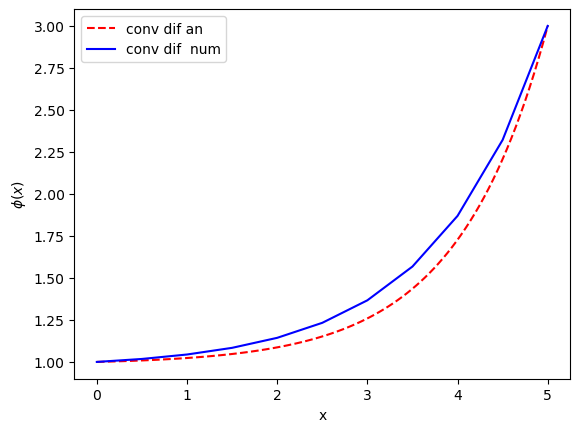

In [5]:
""" solución numérica de la ecuación de convección difusión estacionaria
con cond de contorno de dirichlet con esquema upwind
"""
nx=10
## discretización espacial
x_vec_num=np.linspace(0,Ln, nx+1);# vector de discretización espacial

Delta_x=x_vec_num[1]-x_vec_num[0]

#valores de los parámetros
Γn=1;
a_0n=1;
φ_in=1;
φ_on=3; 

# implementación de la difusión artificial
Pe_Dx=a_0*Delta_x/Γn




#matriz de coeficientes
M=np.zeros((nx-1, nx-1))
#vector de términos indep
RHS=np.zeros( nx-1)

M[0,0]=2*Γn/Delta_x**2+ a_0n/Delta_x 
M[0,1]=-Γn/Delta_x**2
RHS[0] =  S(x_vec_num[0], Ln)-(-Γn/Delta_x**2-a_0n/Delta_x)*φ_in

for i in range(1,nx-2):
    M[i,i] = 2*Γn/Delta_x**2+a_0n/Delta_x
    M[i,i+1] = -Γn/Delta_x**2
    M[i,i-1] = -Γn/Delta_x**2-a_0n/Delta_x
    RHS[i] =  S(x_vec_num[i], Ln)
    

M[nx-2,nx-2]=2*Γn/Delta_x**2 +a_0n/Delta_x
M[nx-2,nx-3]=-Γn/Delta_x**2-a_0n/Delta_x
RHS[nx-2] =  S(x_vec_num[nx-2], Ln)-(-Γn/Delta_x**2)*φ_on

φ_num=np.linalg.solve(M, RHS)
φ_num=np.append([φ_in],φ_num)
φ_num=np.append(φ_num,[φ_on])


plt.plot(x_vec,φ_cd_vec_an, 'r--')
plt.plot(x_vec_num,φ_num, 'b')

plt.xlabel('x')
plt.ylabel('$\phi(x)$')
plt.gca().legend(('conv dif an', 'conv dif  num'))
plt.show()

### Análisis de Viscosidad numérica

En este caso comparamos el caso convectivo puro con esquema _upwind_ con  un esquema centrado para convección difusión con viscosidad numérica $\alpha_{num}$, y comparamos los coeficientes de los $\varg_j$

$$  \begin{aligned}
-\frac{a_0}{\Delta_x}\left( \varg_{i}-\varg_{i-1}\right) &=-\frac{a_0}{ 2\Delta_x}\left( \varg_{i+1}-\varg_{i-1}\right)+\frac{\alpha_{num}}{\Delta_x^2}\left( \varg_{i+1}-2\varg_i+\varg_{i-1}\right)\\
-\frac{a_0}{ \Delta_x} \varg_{i}+\frac{a_0}{ \Delta_x}\varg_{i-1} &=\left(-\frac{2\alpha_{num}}{\Delta_x^2}  \right) \varg_{i}+\left(-\frac{a_0}{ 2\Delta_x}+\frac{\alpha_{num}}{\Delta_x^2}  \right) \varg_{i+1} +\left(\frac{a_0}{ 2 \Delta_x}+\frac{\alpha_{num}}{\Delta_x^2}  \right)\varg_{i-1}\\
\end{aligned}
$$

En este caso la viscosidad numérica resulta $\alpha_{num}=\frac{a_0 \Delta_x}{2}$, esto significa que el esquema upwind en realidad **resuelve un problema de convección difusión con viscosidad $\alpha_{num}$ con segundo orden de exactitud**

Esto permite "reinterpretar" el esquema Upwind reconociendo que en el caso de la convección difusión puede escribirse

$$
-\frac{a_0}{\Delta_x}\left( \varg_{i}-\varg_{i-1}\right)+\frac{\alpha}{\Delta_x^2}\left( \varg_{i+1}-2\varg_i+\varg_{i-1}\right)=-\frac{a_0}{ 2\Delta_x}\left( \varg_{i+1}-\varg_{i-1}\right)+\frac{\alpha +\alpha_{num}}{\Delta_x^2}\left( \varg_{i+1}-2\varg_i+\varg_{i-1}\right)
$$
 
 con $\alpha_{num}=\frac{a_0 \Delta_x}{2}$. Si uno pudiera elegir la viscosidad artificial apropiadamente según la cantidad de convección o difusión de la celda considerada podría adaptarse el esquema para aprovechar las ventajas del esquema centrado y del esquema _upwind_. Teniendo en cuenta que 
 
 
$$\alpha_{num}=\alpha \frac{a_0 \Delta_x}{2\alpha}=\frac{\alpha}{2} \text{Pe}_{\Delta_x}$$



En el caso de que la velocidad sea negativa se debe comparar con el esquema _downwind_ y la viscosidad numérica resulta $\alpha_{num}=\frac{-a_0 \Delta_x}{2}$. Para solucionar este inconveniente se toma el valor absoluto de la velocidad

$$\alpha_{num}=\alpha \frac{\abs{a_0} \Delta_x}{2\alpha}=\frac{\alpha}{2} \text{Pe}_{\Delta_x} \text{sign}(\text{Pe}_{\Delta_x}) =\frac{a_0 \Delta_x}{2} \text{sign}(\text{Pe}_{\Delta_x})$$

### Aplicación como mejora del esquema centrado

La viscosidad numérica puede generalizarse como el producto de $\frac{a_0 \Delta_x}{2}$ por una función del número de Péclet $f(\text{Pe}_{\Delta_x})$. Si se elige $f(\text{Pe}_{\Delta_x})= \text{sign}(\text{Pe}_{\Delta_x})$ se reduce al esquema _upwind_  o _downwind_ según el signo de $a_0$. 

Podría encontrarse una función más eficiente, que agregue más o menos viscosidad según el tipo de problema.

De hecho, se demuestra que si se elige 

$$
f(\text{Pe}_{\Delta_x})=\tanh(2\text{Pe}_{\Delta_x})-\frac{1}{2  \text{Pe}_{\Delta_x}}\rightarrow \alpha_{num}= \frac{a_0 \Delta_x}{2}\left( \tanh(2\text{Pe}_{\Delta_x})-\frac{1}{2  \text{Pe}_{\Delta_x}}\right)
$$

se obtienen los mismos resultados que la solución analítica. De esta manera podemos mejorar el esquema de diferencias centradas, agregando viscosidad numérica sólo cuando es necesario


$$ -\frac{a_0}{ 2\Delta_x}\left( \varg_{i+1}-\varg_{i-1}\right)+\frac{\alpha +\alpha_{art}}{\Delta_x^2}\left( \varg_{i+1}-2\varg_i+\varg_{i-1}\right)$$

{\Delta_x} 0.5
Pe_{\Delta_x} 0.5
Γart= -0.05960146101105879


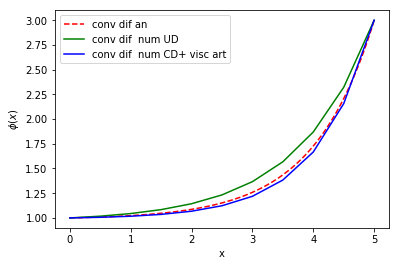

In [90]:
""" solución numérica de la ecuación de convección difusión estacionaria
con cond de contorno de dirichlet
Esquema de diferencias centradas con difusión artificial agregada
"""
nx=10
## discretización espacial
x_vec_num=np.linspace(0,Ln, nx+1);# vector de discretización espacial

Delta_x=x_vec_num[1]-x_vec_num[0]
print('{\Delta_x}', Delta_x)
#valores de los parámetros
Γn=1;
a_0n=1;
φ_in=1;
φ_on=3; 

# agregado de la viscosidad artificial
Pe_deltax= a_0n*Delta_x/Γn
print('Pe_{\Delta_x}', Pe_deltax)
Γart=a_0n*Delta_x/2*(np.tanh(2*Pe_deltax)-1/(2*Pe_deltax))
print('Γart=',Γart)
#matriz de coeficientes
M=np.zeros((nx-1, nx-1))
#vector de términos indep
RHS=np.zeros( nx-1)

# primer fila de la matriz
M[0,0]=2*(Γn+Γart)/Delta_x**2
M[0,1]=-((Γn+Γart)/Delta_x**2-a_0n/2/Delta_x)
RHS[0] =  S(x_vec_num[0], Ln)+((Γn+Γart)/Delta_x**2+a_0n/2/Delta_x)*φ_in

for i in range(1,nx-2): #filas 2 a n-1
    M[i,i] = 2*(Γn+Γart)/Delta_x**2
    M[i,i+1] = -((Γn+Γart)/Delta_x**2-a_0n/2/Delta_x)
    M[i,i-1] = -((Γn+Γart)/Delta_x**2+a_0n/2/Delta_x)
    RHS[i] =  S(x_vec_num[i], Ln)
    
#ultima fila de la matriz
M[nx-2,nx-2]=2*(Γn+Γart)/Delta_x**2
M[nx-2,nx-3]=-((Γn+Γart)/Delta_x**2+a_0n/2/Delta_x)
RHS[nx-2] =  S(x_vec_num[nx-2], Ln)+((Γn+Γart)/Delta_x**2-a_0n/2/Delta_x)*φ_on

φ_num_CD=np.linalg.solve(M, RHS)
φ_num_CD=np.append([φ_in],φ_num_CD)
φ_num_CD=np.append(φ_num_CD,[φ_on])


plt.plot(x_vec,φ_cd_vec_an, 'r--')
plt.plot(x_vec_num,φ_num, 'g')
plt.plot(x_vec_num,φ_num_CD, 'b')

plt.xlabel('x')
plt.ylabel('$\phi(x)$')
plt.gca().legend(('conv dif an', 'conv dif  num UD', 'conv dif  num CD+ visc art'))
plt.show()

# Convección difusión inestacionaria

Cuando se agrega el término temporal en la ecuación de la convección difusión se hace necesario avanzar en cada paso de tiempo

## Convección pura

#### Esquema Forward Time Backward Space

Para el caso de la convección pura, proponemos un esquema hacia adelante en el tiempo y upwind en el espacio (diferencias hacia atrás) se obtiene:

$$ \frac{\varg_i^{(n+1)}-\varg_i^{(n)}}{\Delta_t}=-a_0\frac{\varg_{i}^{(n)}-\varg_{i-1}^{(n)}}{\Delta_x}$$ 
Este esquema se conoce como _Forward Time Backward Space_ (FTBS)

escrito como esquema explicito 

$$ \begin{aligned} \varg_i^{(n+1)} =&\varg_i^{(n)}- \frac{a_0\Delta_t}{\Delta_x} ( \varg_{i}^{(n)}-\varg_{i-1}^{(n)}) \\
 \varg_i^{(n+1)} =&\varg_i^{(n)}(1- \frac{a_0\Delta_t}{\Delta_x})  + \frac{a_0\Delta_t}{\Delta_x} \varg_{i-1}^{(n)})
 \end{aligned}$$ 

ahora el error depende del instante de tiempo que se considere también, por lo que puede definirse un factor de amplificación G
$\epsilon_i^n=a_m^{(n)} \exp \left(\ii \theta_m i  \right)$, $\epsilon_i^{(n+1)}=a_m^{(n+1)} \exp \left(\ii \theta_m i  \right)$

$$ \frac{a_m^{(n+1)} \exp \left(\ii \theta_m i  \right)-a_m^{(n)} \exp \left(\ii \theta_m i  \right)}{\Delta_t}=-a_0\frac{\varg_{i}^{(n)}-\varg_{i-1}^{(n)}}{\Delta_x}$$ 


### Análisis de Von Neumann
a continuación se muestra cómo se obtiene el factor de amplificación mediante el análisis de Von Neumann


In [26]:
""" factor de amplificación para el esquema FTBS"""

i,n, G, x, t ,Delta_x,Delta_t= sym.symbols('i,n,G, x, t, \Delta_x,  \Delta_t ' ,real=True, positive=True)
a_mn,a_mnp1= sym.symbols('a_m^n,a_m^{n+1}')
theta, CFL=sym.symbols( 'theta_m , CFL',real=True)
#φ= sym.Function("phi")(i)

ec_conv_FTBS= (φ(i,n+1)-φ(i, n))/ ( Delta_t) +a_0 /( Delta_x) *(φ(i, n)-φ(i-1, n)) #FTBS=forward time backward space
ec_conv_FTBS=ec_conv_FTBS.subs(φ(i, n+1), a_mnp1*sym.exp(sym.I*theta*i)) #reemplazo phi_i^n+1 por e_i^n+1
ec_conv_FTBS=ec_conv_FTBS.subs(φ(i-1, n), a_mn*sym.exp(sym.I*theta*(i-1)))
ec_conv_FTBS=ec_conv_FTBS.subs(φ(i, n), a_mn*sym.exp(sym.I*theta*(i)))
ec_conv_FTBS=sym.expand(ec_conv_FTBS/a_mn)

## resolvemos para G=a_m^n+1/a_m^n
ec_conv_FTBS=ec_conv_FTBS.subs(a_mnp1/a_mn, G)
ec_conv_FTBS=sym.solve(ec_conv_FTBS ,G) #da una lista con las sols a la ec (en este caso 1 sola)
#ec_conv_FTBS
ec_conv_FTBS=ec_conv_FTBS[0].expand().subs(a_0*Delta_t/Delta_x, CFL)
ec_conv_FTBS=ec_conv_FTBS.subs(sym.exp(-sym.I*theta), sym.cos(theta)+sym.I*sym.sin(theta))# REEMPLAZO LA EXP POR TRIGONOMETRICAS
sym.collect((sym.Abs((ec_conv_FTBS)))**2, CFL).simplify()#TOMO MODULO AL CUADRADO Y SIMPLIFICO
#theta.assumptions0
#Delta_x.assumptions0


CFL**2*(2 - 2*cos(theta_m)) + 2*CFL*(cos(theta_m) - 1) + 1

esta expresión debe ser menor o igual a 1. 
Teniendo en cuenta que  $-1\leq\cos(\theta_m)\leq 1$, luego $-2\leq\cos(\theta_m)-1\leq 0$. Tomando el caso extremo inferior resulta

$$\begin{aligned}
1 -4CFL +4CFL^2 & \leq \abs{G}= 1 \\
 -4CFL +4CFL^2 & \leq 0 \\
  4CFL(1 - CFL) & \leq 0 
\end{aligned}$$

Luego, se concluye que $CFL<1$ para que el esquema sea estable
 

### Esquema _downwind_ , o FTFS

este esquema toma datos de aguas abajo, es decir es un esquema downwind, empleado cuando la velocidad del flujo es negativa

$$ \frac{\varg_i^{(n+1)}-\varg_i^{(n)}}{\Delta_t}=-a_0\frac{\varg_{i+1}^{(n)}-\varg_{i}^{(n)}}{\Delta_x}$$ 

A continuacion verificaremos  que este esquema sólo es estable si $a_0$ es negativa

In [91]:
""" factor de amplificación para el esquema FTFS"""

i,n, G, x, t ,Delta_x,Delta_t= sym.symbols('i,n,G, x, t, \Delta_x,  \Delta_t' ,real=True, positive=True)
a_mn,a_mnp1= sym.symbols('a_m^n,a_m^{n+1}')
theta, CFL=sym.symbols( 'theta_m , CFL',real=True)
#φ= sym.Function("phi")(i)

ec_conv_FTFS= (φ(i,n+1)-φ(i, n))/ ( Delta_t) +a_0 /( Delta_x) *(φ(i+1, n)-φ(i, n))
ec_conv_FTFS=sym.collect(ec_conv_FTFS.expand(), ( φ(i, n), φ(i+1,n)))
ec_conv_FTFS=ec_conv_FTFS.subs(φ(i, n), a_mn*sym.exp(sym.I*theta*i))
ec_conv_FTFS=ec_conv_FTFS.subs(φ(i, n+1), a_mnp1*sym.exp(sym.I*theta*i))
ec_conv_FTFS=ec_conv_FTFS.subs(φ(i+1, n), a_mn*sym.exp(sym.I*theta*(i+1)))
ec_conv_FTFS=sym.expand(ec_conv_FTFS/a_mn)

ec_conv_FTFS=ec_conv_FTFS.subs(a_0*Delta_t/Delta_x, CFL)
#ec_conv_FTFS
# resolvemos para G=a_m^n+1/a_m^n
ec_conv_FTFS=ec_conv_FTFS.subs(a_mnp1/a_mn, G)
#sym.pprint(ec_conv_FTFS)
ec_conv_FTFS=sym.solve(ec_conv_FTFS ,G)
#sym.pprint(ec_conv_FTFS)
ec_conv_FTFS=ec_conv_FTFS[0].expand().subs(a_0*Delta_t/Delta_x, CFL)
ec_conv_FTFS
ec_conv_FTFS=ec_conv_FTFS.subs(CFL*sym.exp(sym.I*theta), CFL*(sym.cos(theta)-sym.I*sym.sin(theta)))
sym.collect((sym.Abs((ec_conv_FTFS)))**2, CFL).simplify()
#theta.assumptions0
#Delta_x.assumptions0


CFL**2*(2 - 2*cos(theta_m)) - 2*CFL*(cos(theta_m) - 1) + 1

Teniendo en cuenta que  $-1\leq\cos(\theta_m)\leq 1$, luego $-2\leq\cos(\theta_m)-1\leq 0$. Tomando el caso extremo inferior resulta

$$\begin{aligned}
1 -4CFL -4CFL^2 & \leq \abs{G}= 1 \\
 -4CFL -4CFL^2 & \leq 0 \\
  4CFL(1 + CFL) & \leq 0 
\end{aligned}$$

Luego, se concluye que $-1\leq CFL\leq 0$ para que el esquema sea estable, lo que implica que la velocidad sea negativa.

### Viscosidad numérica

Para analizar el efecto de la viscosidad numérica en este caso proponemos usar la serie de Taylor para incluir términos de mayor orden

$$ \begin{aligned}
\varg_i^{(n+1)}=\varg(x_i, t+\Delta_t)=\varg(x_i, t)+\parder{\varg}{t}\Delta_t+ \pardder{\varg}{t}\frac{\Delta_t^2}{2}\dots \mathcal{O}(\Delta_t^3)\\
\varg_{i-1}^{(n)}=\varg(x_i -\Delta_x, t)=\varg(x_i, t)-\parder{\varg}{x}\Delta_x+ \pardder{\varg}{x}\frac{\Delta_x^2}{2}\dots \mathcal{O}(\Delta_x^3)
\end{aligned}
$$

Despejando y reemplazando en el esquema


$$ \varg(x_i, t)+\parder{\varg}{t}\Delta_t+ \pardder{\varg}{t}\frac{\Delta_t^2}{2}\dots \mathcal{O}(\Delta_t^3)-\varg_i^{(n)}=-\frac{a_0{\Delta_t}}{\Delta_x} \left[\varg_{i}^{(n)}-\varg(x_i, t)+\parder{\varg}{x}\Delta_x- \pardder{\varg}{x}\frac{\Delta_x^2}{2}\dots + \mathcal{O}(\Delta_x^3)\right]$$ 

Los términos de $\varg_i^{(n)}$ se cancelan, quedando dos derivadas primeras y dos derivadas segundas. Para combinar ambas derivadas segundas, teniendo en cuenta la PDE original

$$ \begin{aligned}
\parder{\phi}{t}&=-a_0 \parder{\phi}{x}\\
\parder{}{t}\parder{\phi}{t}&=\parder{}{t}\left[-a_0 \parder{\phi}{x}\right]\\
 \pardder{\phi}{t}&=\parder{}{t}\left[-a_0 \parder{\phi}{x}\right]=\parder{}{x}\left[-a_0 \parder{\phi}{t}\right]=a_0^2\pardder{\varg}{x}\\
\end{aligned}$$

Reemplazando en la expresión anterior se obtiene:

$$ \varg(x_i, t)+\parder{\varg}{t}\Delta_t+ a_0^2\pardder{\varg}{x}\frac{\Delta_t^2}{2}\dots \mathcal{O}(\Delta_t^3)-\varg_i^{(n)}=-\frac{a_0{\Delta_t}}{\Delta_x} \left[\varg_{i}^{(n)}-\varg(x_i, t)+\parder{\varg}{x}\Delta_x - \pardder{\varg}{x}\frac{\Delta_x^2}{2}\dots + \mathcal{O}(\Delta_x^3)\right]$$ 

Viendo esta ecuación, si $a_0 \Delta_t=\Delta_x$ los términos de la derivada segunda resp a x se cancelan entre sí, y el esquema tiene error de truncamiento de tercer orden. Reordenando la expresión

$$ \begin{aligned}\parder{\varg}{t} &=-\frac{a_0{\Delta_t}}{\Delta_x \Delta_t} \left[\parder{\varg}{x}\Delta_x- \pardder{\varg}{x}\frac{\Delta_x^2}{2}\dots +\mathcal{O}(\Delta_x^3)\right] -a_0^2\pardder{\varg}{x}\frac{\Delta_t^2}{2\Delta_t}\dots -\mathcal{O}(\Delta_t^2)\\ 
\parder{\varg}{t} &=-a_0 \parder{\varg}{x} +\pardder{\varg}{x}\frac{ a_0 \Delta_x}{2} \left[ 1- \frac{a_0 \Delta_t}{\Delta_x}\right] \dots -\mathcal{O}(\Delta_t^2, \frac{\Delta_x^3}{\Delta_t})\\ 
\end{aligned}$$ 

Nuevamente aparece la viscosidad artificial $\alpha_{num}=\frac{ a_0 \Delta_x}{2}$ pero afectada por un facto que depende del CFL, y por ende del paso de tiempo. si tomamos $\Delta_t=\Delta_x/a_0$ tendremos CFL=1 y estaremos en el límite de la estabilidad, pero tendremos viscosidad numérica nula y el error de truncamiento será de tercer orden.  



In [92]:
v_num=sym.Symbol('\nu_num')
ec_conv_vnum= (φ(i,n+1)-φ(i, n))/ ( Delta_t) -a_0 /( Delta_x) *(φ(i+1, n)-φ(i, n))-v_num*(φ(i+1, n)-2*φ(i, n)+φ(i-1, n))/Delta_x
ec_conv_vnum=ec_conv_vnum.subs(v_num, a_0*Delta_x/2*(1-a_0*Delta_t/Delta_x))
sym.collect(ec_conv_vnum, (φ(i, n), φ(i+1, n)))

-a_0*(-\Delta_t*a_0/\Delta_x + 1)*(-2*phi(i, n) + phi(i - 1, n) + phi(i + 1, n))/2 - a_0*(-phi(i, n) + phi(i + 1, n))/\Delta_x + (-phi(i, n) + phi(i, n + 1))/\Delta_t

Δt=  0.02 Δx= 0.2


<IPython.core.display.Javascript object>


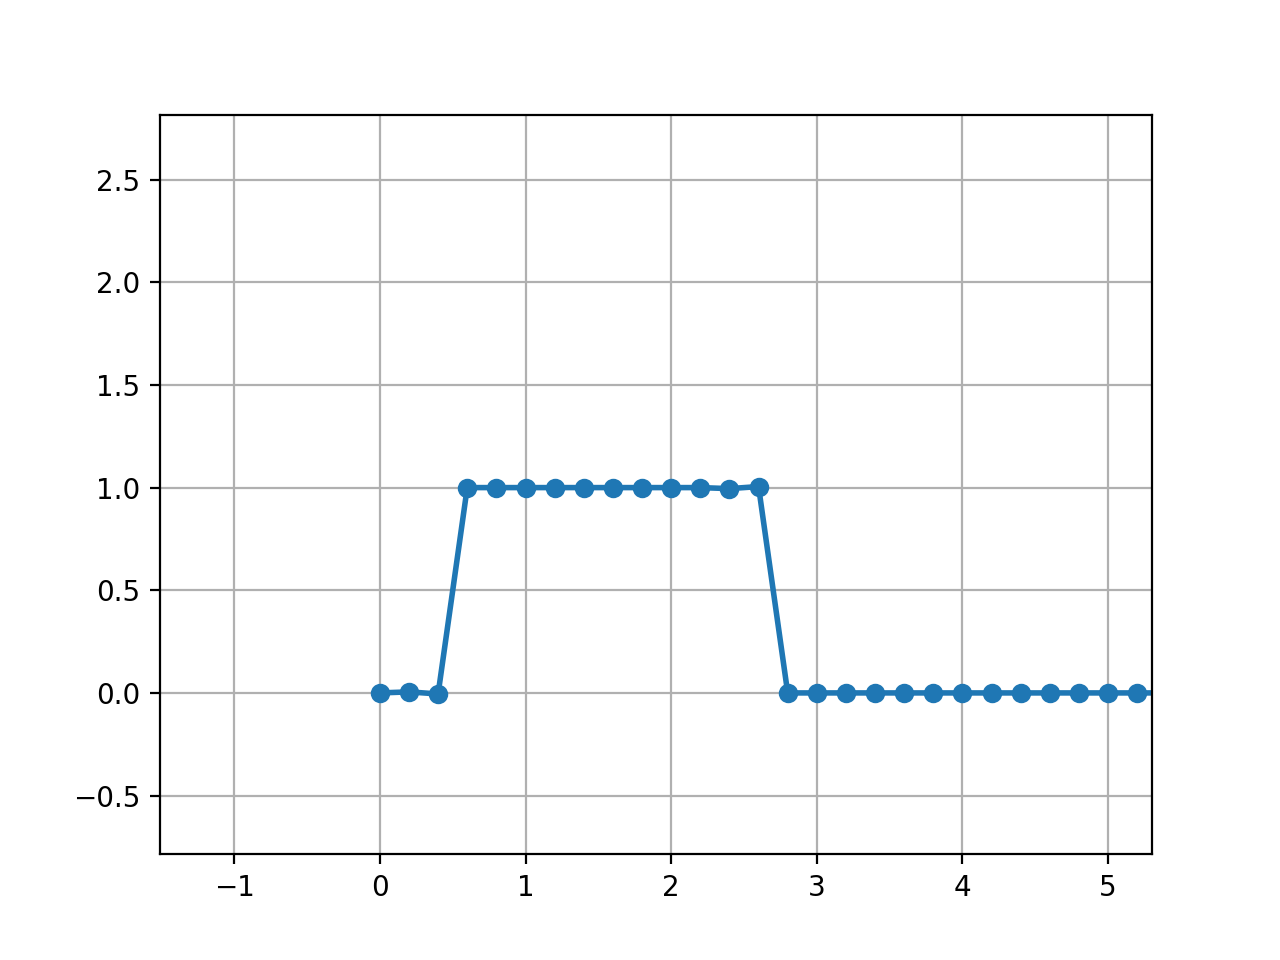

In [6]:
"""
Solución  de la convección difusión  inestacionaria con FTBS
"""
from matplotlib.animation import FuncAnimation
%matplotlib notebook

nx=50;
ndt=50;

#valores de los parámetros
Γn=0.01;
L=10;
a_0n=10;

## discretización espacial
x_vec_num=np.linspace(0,L, nx+1);# vector de discretización espacial

Δx=x_vec_num[1]-x_vec_num[0]

# discretización temporal 

CFL=01.0;
Δt=min(CFL*Δx/a_0n, 0.5*Δx**2/Γn) 
print('Δt= ', Δt, 'Δx=',Δx )

# BCS periódicas



#matriz de solución
φ_sol=np.zeros((ndt,nx+1))

"""condicion inicial"""


φ_in=np.zeros(nx-2) #condición inicial
φ_in[1:m.floor(nx/4)]=1# onda cuadrada de x=Deltax hasta x=0.4L
φ_sol[0,1:nx-1]=φ_in


for j in range(0, ndt-1):
    for i in range(0, nx):
        φ_sol[j+1,i]=φ_sol[j,i]-a_0n*Δt/Δx*(φ_sol[j,i]-φ_sol[j,i-1])+ Γn*Δt/Δx**2*(φ_sol[j,i-1]-2*φ_sol[j, i]+φ_sol[j,i+1])

    φ_sol[j+1,0]=φ_sol[j+1,nx-1] #imposición de BC periódica

"""
gráficos de las soluciones con pyplot
"""
"""
plt.plot( x_vec_num, φ_sol[0, :], lw=1, marker='x')
plt.plot( x_vec_num, φ_sol[m.floor(ndt/2), :], lw=1, marker='x')
plt.plot(x_vec_num, φ_sol[ndt-1, :], lw=1, marker='x')
plt.xlabel('x')
plt.ylabel('$\phi(x, t)$')
plt.gca().legend(('t=0','t=n/2 Δt','t=nΔt'))
plt.show()

"""

"""animación de la propagación de la onda"""

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, L), ylim=(-1, 2))
#ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = x_vec_num
    thisy = φ_sol[i, :]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


ani = FuncAnimation(fig, func=animate, frames = range(1, ndt),
                              interval=100, blit=True, init_func=init)
plt.show()

### Esquema CIR o upwind generalizado

Courant, Isaacson y Rees crearon una extensión del esquema _upwind_ con la propiedad de que funciona de manera estable independientemente de si la velocidad es positiva o negativa. Para ello se definen las velocidades
$$
a_{0+}=\frac{a_0+\abs{a_0}}{2}; \qquad a_{0-}=\frac{a_0-\abs{a_0}}{2};
$$

El esquema resulta de la suma de un esquema _upwind_ con $a_{0+}$ y un esquema _downwind_ $a_{0-}$

$$ \frac{\varg_i^{(n+1)}-\varg_i^{(n)}}{\Delta_t}=-a_{0+}\frac{\varg_{i}^{(n)}-\varg_{i-1}^{(n)}}{\Delta_x}-a_{0-}\frac{\varg_{i+1}^{(n)}-\varg_{i}^{(n)}}{\Delta_x}$$ 

de esta manera, si $a_0>0$, entonces $a_{0+}=a_0$ y $a_{0-}=0$. Por otro lado, si $a_0<0$, entonces $a_{0+}=0$ y $a_{0-}=a_0$

## Convección difusión inestacionaria


Probaremos ahora con un esquema centrado para  la convección, ya que la difusión debería estabilizar el esquema

$$ \frac{\varg_i^{(n+1)}-\varg_i^{(n)}}{\Delta_t}=-a_0\frac{\varg_{i+1}^{(n)}-\varg_{i-1}^{(n)}}{2\Delta_x}+\Gamma  \frac{\varg_{i+1}^{(n)}-2\varg_{i}^{(n)}+ \varg_{i-1}^{(n)}}{\Delta_x^2}$$ 

Veamos qué obtenemos cuando aplicamos el análisis de Von Neumann


In [104]:
""" factor de amplificación para el esquema FTCS para convección difusión"""

i,n, G, x, t ,Delta_x,Delta_t, Γ= sym.symbols('i,n,G, x, t, \Delta_x,  \Delta_t, \Gamma ' ,real=True, positive=True)
a_mn,a_mnp1= sym.symbols('a_m^n,a_m^{n+1}')
theta, CFL, Fo=sym.symbols( 'theta_m , CFL, Fo',real=True)
#φ= sym.Function("phi")(i)

ec_conv_FTCS= (φ(i,n+1)-φ(i, n))/ ( Delta_t)+a_0 /( Delta_x) *(φ(i, n)-φ(i-1, n)) -Γ/Delta_x**2*(φ(i+1,n)-2*φ(i, n)+φ(i-1, n)) #FTBS=forward time backward space
ec_conv_FTCS=ec_conv_FTCS.subs(φ(i, n+1), a_mnp1*sym.exp(sym.I*theta*i)) #reemplazo phi_i^n+1 por e_i^n+1
ec_conv_FTCS=ec_conv_FTCS.subs(φ(i-1, n), a_mn*sym.exp(sym.I*theta*(i-1)))
ec_conv_FTCS=ec_conv_FTCS.subs(φ(i+1, n), a_mn*sym.exp(sym.I*theta*(i+1)))
ec_conv_FTCS=ec_conv_FTCS.subs(φ(i, n), a_mn*sym.exp(sym.I*theta*(i)))
ec_conv_FTCS=sym.expand(ec_conv_FTCS/a_mn)

## resolvemos para G=a_m^n+1/a_m^n
ec_conv_FTCS=ec_conv_FTCS.subs(a_mnp1/a_mn, G)
ec_conv_FTCS=sym.solve(ec_conv_FTCS ,G) #da una lista con las sols a la ec (en este caso 1 sola)

ec_conv_FTCS=ec_conv_FTCS[0].expand().subs(a_0*Delta_t/Delta_x, CFL)
ec_conv_FTCS=ec_conv_FTCS.subs(Γ*Delta_t/Delta_x**2, Fo)
ec_conv_FTCS=ec_conv_FTCS.subs(sym.exp(sym.I*theta), sym.cos(theta)-sym.I*sym.sin(theta))
ec_conv_FTCS=ec_conv_FTCS.subs(sym.exp(-sym.I*theta), sym.cos(theta)+sym.I*sym.sin(theta))# REEMPLAZO LA EXP POR TRIGONOMETRICAS
sym.pprint(ec_conv_FTCS)
#sym.collect((sym.Abs((ec_conv_FTCS)))**2, (sym.cos(theta), sym.sin(theta) )).simplify()#TOMO MODULO AL CUADRADO Y SIMPLIFICO
ec_conv_FTCS=ec_conv_FTCS.subs(CFL, 1)
ec_conv_FTCS=ec_conv_FTCS.subs(Fo, 0.5)
sym.Abs(ec_conv_FTCS).simplify()
#theta.assumptions0
#Delta_x.assumptions0


               CFL                                                        Fo  
-CFL + ──────────────────── + Fo⋅(-ⅈ⋅sin(θₘ) + cos(θₘ)) - 2⋅Fo + ─────────────
       -ⅈ⋅sin(θₘ) + cos(θₘ)                                      -ⅈ⋅sin(θₘ) + 

           
─────── + 1
cos(θₘ)    


sqrt(0.25*sin(theta_m)**6 - 1.0*sin(theta_m)**4*cos(theta_m) - 0.75*sin(theta_m)**4 - 2.25*sin(theta_m)**2 + 0.25*cos(theta_m)**6 + 1.0*cos(theta_m)**5 - 2.0*cos(theta_m)**3 - 3.0*cos(theta_m) + 4.75)

Después de despejar la condición para el CFL y el Fo  se obtienen las mismas condiciones de estabilidad para el caso convectivo puro y y difusivo puro combinadas

$$ CFL\leq 1 \, \qquad Fo \leq 0.5  $$

Implementando el código obtenemos

Δt=  0.099 Δtcfl= 0.099 Δx= 0.1 Pe_dx= 0.1


C:\Users\andre\AppData\Local\Temp\ipykernel_23832\27502619.py:48: RuntimeWarning: overflow encountered in scalar multiply
  φ_sol[j+1,i]=φ_sol[j,i]-a_0n*Δt/2/Δx*(φ_sol[j,i+1]-φ_sol[j,i-1])+ Γn*Δt/Δx**2*(φ_sol[j,i-1]-2*φ_sol[j, i]+φ_sol[j,i+1])
C:\Users\andre\AppData\Local\Temp\ipykernel_23832\27502619.py:48: RuntimeWarning: overflow encountered in scalar add
  φ_sol[j+1,i]=φ_sol[j,i]-a_0n*Δt/2/Δx*(φ_sol[j,i+1]-φ_sol[j,i-1])+ Γn*Δt/Δx**2*(φ_sol[j,i-1]-2*φ_sol[j, i]+φ_sol[j,i+1])
C:\Users\andre\AppData\Local\Temp\ipykernel_23832\27502619.py:48: RuntimeWarning: overflow encountered in scalar subtract
  φ_sol[j+1,i]=φ_sol[j,i]-a_0n*Δt/2/Δx*(φ_sol[j,i+1]-φ_sol[j,i-1])+ Γn*Δt/Δx**2*(φ_sol[j,i-1]-2*φ_sol[j, i]+φ_sol[j,i+1])
C:\Users\andre\AppData\Local\Temp\ipykernel_23832\27502619.py:48: RuntimeWarning: invalid value encountered in scalar add
  φ_sol[j+1,i]=φ_sol[j,i]-a_0n*Δt/2/Δx*(φ_sol[j,i+1]-φ_sol[j,i-1])+ Γn*Δt/Δx**2*(φ_sol[j,i-1]-2*φ_sol[j, i]+φ_sol[j,i+1])
C:\Users\andre\AppData\Local\

<IPython.core.display.Javascript object>


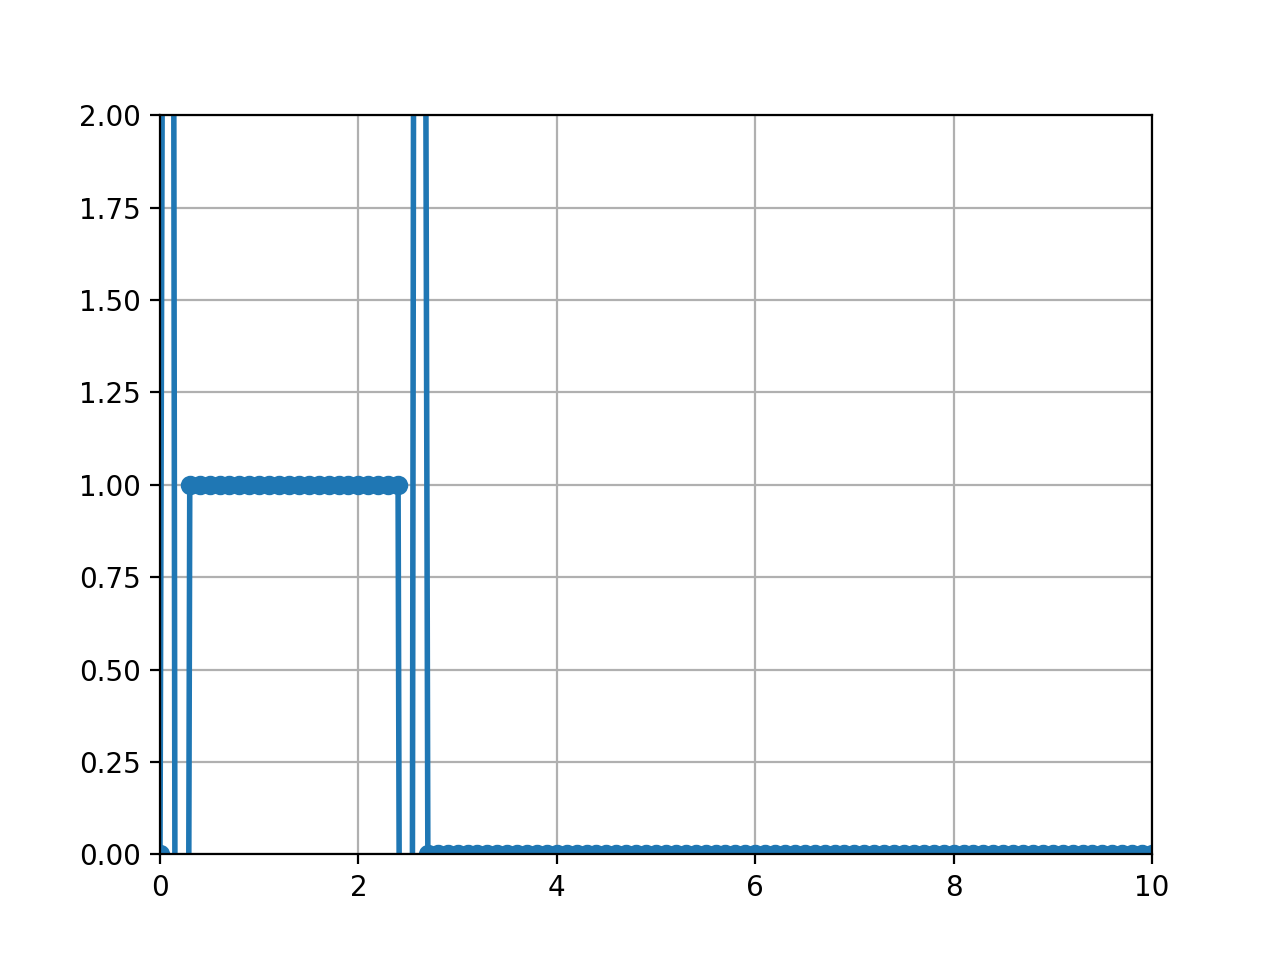

In [7]:
"""
Solución  de la convección difusión  inestacionaria con FTCS
"""
from matplotlib.animation import FuncAnimation
%matplotlib notebook

nx=100;
ndt=200;

#valores de los parámetros
Γn=1.0;
L=10;
a_0n=1;

## discretización espacial
x_vec_num=np.linspace(0,L, nx+1);# vector de discretización espacial

Δx=x_vec_num[1]-x_vec_num[0]

# discretización temporal 

CFL=0.99; Fo=0.5 #numeros de courant y de Fourier
 
Pe_dx =a_0n*Δx/Γn #número de peclet de la malla

#Δt=min(CFL*Δx/a_0n, Fo*Δx**2/Γn)#, Pe_dx/2*Δx/a_0n) 
Δtcfl=CFL*Δx/a_0n
Δt=CFL*Δx/a_0n
print('Δt= ', Δt, 'Δtcfl=', Δtcfl, 'Δx=',Δx, 'Pe_dx=', Pe_dx )

# BCS periódicas



#matriz de solución
φ_sol=np.zeros((ndt,nx+1))

"""condicion inicial"""


φ_in=np.zeros(nx-2) #condición inicial
φ_in[1:m.floor(nx/4)]=1# onda cuadrada de x=Deltax hasta x=0.4L
φ_sol[0,1:nx-1]=φ_in


for j in range(0, ndt-1):
    for i in range(0, nx):
        φ_sol[j+1,i]=φ_sol[j,i]-a_0n*Δt/2/Δx*(φ_sol[j,i+1]-φ_sol[j,i-1])+ Γn*Δt/Δx**2*(φ_sol[j,i-1]-2*φ_sol[j, i]+φ_sol[j,i+1])

    φ_sol[j+1,0]=φ_sol[j+1,nx-1]

"""
gráficos de las soluciones con pyplot
"""
"""
plt.plot( x_vec_num, φ_sol[0, :], lw=1, marker='x')
plt.plot( x_vec_num, φ_sol[m.floor(ndt/2), :], lw=1, marker='x')
plt.plot(x_vec_num, φ_sol[ndt-1, :], lw=1, marker='x')
plt.xlabel('x')
plt.ylabel('$\phi(x, t)$')
plt.gca().legend(('t=0','t=n/2 Δt','t=nΔt'))
plt.show()

"""

"""animación de la propagación de la onda"""

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, L), ylim=(0, 2))
#ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = x_vec_num
    thisy = φ_sol[i, :]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


ani = FuncAnimation(fig, func=animate, frames = range(1, ndt),
                              interval=100, blit=True, init_func=init)
plt.show()

# Convección difusión bidimensional

En el caso de tener dos dimensiones, la velocidad posee dos componentes y la dirección de propagación del frente de onda depende de la tangente de su cociente

$$\vec{a_0}=a_{0x}\hat{i} +a_{0y}\hat {y}$$


Teniendo en cuenta que  $\nabla\cdot(\alpha\vec{A})=\nabla \alpha \cdot \vec{A} +\nabla  \cdot \vec{A} \alpha $   y asumiendo $\Gamma$ constante, la ecuación de conservación se expresa como
$$\begin{aligned}
\parder{\phi}{t}+ \nabla\cdot( \vec{a_0} \phi)&=\nabla\cdot( \Gamma \nabla\phi)+ S_\phi \\
\parder{\phi}{t}+ (\nabla\cdot \vec{a_0}) \phi +a_0\cdot \nabla \phi  &=\Gamma (  \nabla^2\phi)+ S_\phi \\
\parder{\phi}{t}+  \vec{a_0}  \cdot \nabla \phi  &=\Gamma (  \pardder{\phi}{x}+\pardder{\phi}{y})+ S_\phi \\
\parder{\phi}{t}+  a_{0x} \parder{\phi}{x}+a_{0y} \parder{\phi}{y}  &=\Gamma (  \pardder{\phi}{x}+\pardder{\phi}{y})+ S_\phi 
\end{aligned}
$$

Reemplazando las derivadas parciales por diferencias finitas se obtiene un primer esquema numérico. En este caso la variable $\phi $ es función de x, y y t. Por ende se le asocian dos subíndices y un superíndice
$$\phi(x,y,t)=\phi_{i,j}^n$$

$$ 
\frac{\phi_{i,j}^{(n+1)}-\phi_{i,j}^{(n)}}{\Delta_t}+  a_{0x} \frac{\phi^{(n)}_{i, j}-\phi^{(n)}_{i-1, j}}{\Delta_x}+a_{0y} \frac{\phi^{(n)}_{i, j}-\phi^{(n)}_{i, j-1}}{\Delta_y}  =\Gamma (  \frac{\phi^{(n)}_{i+1, j}-2\phi^{(n)}_{i, j}+\phi^{(n)}_{i-1, j}}{\Delta_x^2}+\frac{\phi^{(n)}_{i, j+1}-2\phi^{(n)}_{i, j}+\phi^{(n)}_{i, j-1}}{\Delta_x^2})+ S_\phi $$


Para  implementar la solución primero debemos elegir una estructura de datos para almacenar los valores de $\phi$.
Tenemos dos opciones para ello:

1. Almacenar cada instante de tiempo en una matriz (n,m), de manera que todos los datos queden en un arreglo de 3 dimensiones. Esto es simple de implementar, pero dificulta el uso de solvers implícitos ya que para armar el sistema de ecuaciones hay que reconvertir a $\phi$ a un vector. Otra desventaja es que requiere el uso de dos bucles for, siendo menos eficiente computacionalmente

2. Almacenar a $\phi$ en un vector unidimensional de longitud n.m leyendo la matriz por filas o columnas. Esta formulación resulta más natural para implementar un esquema implícito y requiere menos recursos para su implementación explicita.


## Esquema explicito

Evaluamos la estabilidad del esquema mediante la técnica de Von Neumann, proponiendo $e^n_{m, i,j}=a^n_{m}\exp \left(\ii \theta_{x,m} i  \right)\exp \left(\ii \theta_{x,m} j  \right)$. Encontraremos primero la condición de estabilidad para la convección pura




In [79]:
""" factor de amplificación para el esquema upwind para convección pura 2D"""

i,j,n, G, x, t ,Delta_x, Delta_y,Delta_t= sym.symbols('i,j,n,G, x, t, \Delta_x,\Delta_y,  \Delta_t ' ,real=True, positive=True)
a_mn,a_mnp1= sym.symbols('a_m^n,a_m^{n+1}')
thetax,thetay,a_0x, a_0y, Cx, Cy=sym.symbols( ' theta_{xm}, theta_{ym}, a_{0x},a_{0y} , Cx, Cy',real=True)
#φ= sym.Function("phi")(i)

ec_conv_2D= (φ(i,j,n+1)-φ(i,j, n))/ ( Delta_t) +a_0x /( Delta_x) *(φ(i,j, n)-φ(i-1,j, n))+a_0y /( Delta_y) *(φ(i,j, n)-φ(i,j-1, n))#FTBS=forward time backward space

ec_conv_2D=ec_conv_2D.subs(φ(i,j, n+1), a_mnp1*sym.exp(sym.I*thetax*i)*sym.exp(sym.I*thetay*j)) #reemplazo phi_i^n+1 por e_i^n+1
ec_conv_2D=ec_conv_2D.subs(φ(i-1,j, n), a_mn*sym.exp(sym.I*thetax*(i-1))*sym.exp(sym.I*thetay*j))
ec_conv_2D=ec_conv_2D.subs(φ(i,j, n), a_mn*sym.exp(sym.I*thetax*(i))*sym.exp(sym.I*thetay*j))
ec_conv_2D=ec_conv_2D.subs(φ(i,j-1, n), a_mn*sym.exp(sym.I*thetax*(i))*sym.exp(sym.I*thetay*(j-1)))
ec_conv_2D=sym.expand(ec_conv_2D/a_mn)


## resolvemos para G=a_m^n+1/a_m^n
ec_conv_2D=ec_conv_2D.subs(a_mnp1/a_mn, G)
ec_conv_2D=sym.solve(ec_conv_2D ,G) #da una lista con las sols a la ec (en este caso 1 sola)

ec_conv_2D=ec_conv_2D[0].expand().subs(a_0x*Delta_t/Delta_x, Cx).subs(a_0y*Delta_t/Delta_y, Cy)
ec_conv_2D=ec_conv_2D.subs(sym.exp(-sym.I*thetax), sym.cos(thetax)+sym.I*sym.sin(thetax))# REEMPLAZO LA EXP POR TRIGONOMETRICAS
ec_conv_2D=ec_conv_2D.subs(sym.exp(-sym.I*thetay), sym.cos(thetay)+sym.I*sym.sin(thetay))
ec_conv_2D=sym.collect((sym.Abs((ec_conv_2D)))**2, (sym.cos(thetax),sym.cos(thetay), sym.sin(thetax),sym.sin(thetay))).simplify()#TOMO MODULO AL CUADRADO Y SIMPLIFICO
ec_conv_2D=ec_conv_2D.subs(thetax,sym.pi ).subs(thetay,sym.pi )
#ec_conv_2D=sym.solve(ec_conv_2D-1 ,Cx)
(ec_conv_2D-1).factor()
#sym.collect(ec_conv_2D.expand(),(sym.cos(thetax),sym.cos(thetay), sym.sin(thetax),sym.sin(thetay))).simplify()
#theta.assumptions0
#Delta_x.assumptions0


4*(Cx + Cy)*(Cx + Cy - 1)

Se obtiene que el factor de amplificación es

$$ G= -\frac{\Delta_t a_{0y}}{\Delta_y} + \frac{\Delta_t a_{0y}}{\Delta_y} \exp(-\ii*\theta_{ym})- \frac{\Delta_t a_{0x}}{\Delta_x} + \frac{\Delta_t a_{0x}}{\Delta_x}\exp(-\ii \theta_{xm}) + 1$$

En este caso tenemos dos relaciones análogas al número CFL: $C_x=\frac{\Delta_t a_{0x}}{\Delta_x}$ y $C_y=\frac{\Delta_t a_{0y}}{\Delta_y}$. Reemplazando $C_x$ y $C_y$  y tomando el módulo de G obtenemos

 $$\abs{G}=−2C_x^2 \cos(\theta_{xm})+2C_x^2−2 C_x C_y \cos(\theta_{xm})−2C_x C_y \cos(\theta_{ym})+2C_x C_y\cos(\theta_{xm} -\theta_{ym})+2C_x C_y+2C_x\cos(\theta_{xm})−2C_x−2C_y^2\cos(\theta_{ym})+2C_y^2+2C_y \cos(\theta_{ym})−2C_y+1  
 $$

Nuevamente, si elegimos $\theta_{ym}=\theta_{xm}=\pi$ obtenemos el mayor valor de G

$$\abs{G}=4 C_x^2+8C_xC_y−4C_x+4C_y^2−4C_y+1\leq1$$

$$4 C_x^2+8C_xC_y−4C_x+4C_y^2−4C_y\leq0$$
factorizando se obtiene
$$ 4(C_x+C_y)(C_x+C_y−1)\leq 0 $$

Se obtiene entonces que la condición máxima de estabilidad es $C_x+C_y=1$ .Reemplazando su definición
$$\frac{\Delta_t a_{0x}}{\Delta_x}+ \frac{\Delta_t a_{0y}}{\Delta_y}=1 $$

despejando el $\Delta_t$ se obtiene
$$\Delta_t =\frac{1}{\frac{a_{0x}}{\Delta_x}+ \frac{a_{0y}}{\Delta_y} } $$

Introduciendo el número CFL para aumentar la estabilidad resulta
$$\Delta_t =\frac{CFL}{\frac{a_{0x}}{\Delta_x}+ \frac{a_{0y}}{\Delta_y} } $$

Con lo cual la restricción de estabilidad sobre el paso de tiempo es aún más estricta que para el caso 1D

In [8]:
""" Solución de la convección difusión  lineal bidimensional
con la estructura de datos tipo 1 (arreglo de 3 dimensiones) 
en un dominio rectangular
"""

from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots
import matplotlib.cm as cm

nx=100;
ny=100;
ndt=100;


Lx=10;
Ly=10;
#valores de los parámetros
Γn=0.00;

a_0x=1;
a_0y=1;
a_0=[a_0x, a_0y];

## discretización espacial
x_vec_num=np.linspace(0,Lx, nx+1);# vector de discretización espacial en x
y_vec_num=np.linspace(0,Ly, ny+1);# vector de discretización espacial en x

Δx=x_vec_num[1]-x_vec_num[0]
Δy=y_vec_num[1]-y_vec_num[0]

# discretización temporal 

CFL=1.0; Fo=0.5 #numeros de courant y de Fourier
 
Pe_dx =m.sqrt(a_0x**2+a_0y**2)*Δx/Γn #número de peclet de la malla

Δt=min(CFL/(a_0x/Δx+a_0y/Δy), Fo*1/(1/Δx**2+1/Δy**2)/Γn)#, Pe_dx/2*Δx/a_0n) 
Δtcfl=CFL*(Δx/a_0x+Δy/a_0y)
#Δt=CFL*Δx/m.sqrt(a_0x**2+a_0y**2)
print('Δt= ', Δt, 'Δtcfl=', Δtcfl, 'Δx=',Δx, 'Pe_dx=', Pe_dx )

# BCS periódicas



#matriz de solución
φ_sol=np.zeros((ndt,nx+1, ny+1))

"""condicion inicial"""


φ_in=np.zeros((nx-2, ny-2)) #condición inicial
φ_in[1:int(nx/4),1:int(ny/4)]=1# onda cuadrada de x=(Deltax, Deltay) hasta x=(0.4Lx, 0.4Ly)
φ_sol[0,1:nx-1, 1:ny-1]=φ_in


###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig1 = plt.figure(num=1, figsize=(11, 7), dpi=100)
ax = fig1.gca(projection='3d')                      
X, Y = np.meshgrid(x_vec_num, y_vec_num)                            
surf = ax.plot_surface(X, Y, φ_sol[0,:, :], cmap=cm.viridis)
plt.show()

##Iteraciones para obtener la solución
for j in range(0, ndt-1):
#    for i in range(0, nx):
#        for k in range(0, ny):
#            φ_sol[j+1,i,k]=(φ_sol[j,i,k]-a_0x*Δt/Δx*(φ_sol[j,i, k]-φ_sol[j,i-1,k]) 
#                -a_0y*Δt/Δy*(φ_sol[j,i, k]-φ_sol[j,i,k-1])+ Γn*Δt/Δx**2*(φ_sol[j,i-1,k]-2*φ_sol[j, i,k]+φ_sol[j,i+1,k]) 
#                    + Γn*Δt/Δy**2*(φ_sol[j,i,k-1]-2*φ_sol[j, i,k]+φ_sol[j,i,k+1]))

    φ_sol[j+1,1:nx,1:ny]=(φ_sol[j,1:nx,1:ny]-a_0x*Δt/Δx*(φ_sol[j,1:nx, 1:ny]-φ_sol[j,0:-2,1:nx])
                          -a_0y*Δt/Δy*(φ_sol[j,1:nx, 1:ny]-φ_sol[j,1:nx,0:-2])+ 
                          Γn*Δt/Δx**2*(φ_sol[j,0:-2,1:ny]-2*φ_sol[j, 1:nx,1:ny]+φ_sol[j,2:nx+1,1:ny])+
                          Γn*Δt/Δy**2*(φ_sol[j,1:nx,0:-2]-2*φ_sol[j, 1:nx,1:ny]+φ_sol[j,1:nx,2:ny+1]))
   
    φ_sol[j+1,0, :]=φ_sol[j+1,nx-1, :]
    φ_sol[j+1,:, 0]=φ_sol[j+1,:, ny-1]
    
    
fig2 = plt.figure(num=2, figsize=(11, 7), dpi=100)
ax = fig2.gca(projection='3d')  
surf = ax.plot_surface(X, Y, φ_sol[ndt-1,:, :], cmap=cm.viridis)
plt.show()
"""
gráficos de las soluciones con pyplot
"""
"""
plt.plot( x_vec_num, φ_sol[0, :], lw=1, marker='x')
plt.plot( x_vec_num, φ_sol[m.floor(ndt/2), :], lw=1, marker='x')
plt.plot(x_vec_num, φ_sol[ndt-1, :], lw=1, marker='x')
plt.xlabel('x')
plt.ylabel('$\phi(x, t)$')
plt.gca().legend(('t=0','t=n/2 Δt','t=nΔt'))
plt.show()

"""

"""animación de la propagación de la onda"""







"""

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, L), ylim=(0, 2))
#ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = x_vec_num
    thisy = φ_sol[i, :]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


ani = FuncAnimation(fig, func=animate, frames = range(1, ndt),
                              interval=100, blit=True, init_func=init)
plt.show()
"""

C:\Users\andre\AppData\Local\Temp\ipykernel_23832\1949155756.py:34: RuntimeWarning: divide by zero encountered in scalar divide
  Pe_dx =m.sqrt(a_0x**2+a_0y**2)*Δx/Γn #número de peclet de la malla
C:\Users\andre\AppData\Local\Temp\ipykernel_23832\1949155756.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Δt=min(CFL/(a_0x/Δx+a_0y/Δy), Fo*1/(1/Δx**2+1/Δy**2)/Γn)#, Pe_dx/2*Δx/a_0n)


Δt=  0.05 Δtcfl= 0.2 Δx= 0.1 Pe_dx= inf


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'